In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Class Distribution of Heart Disease

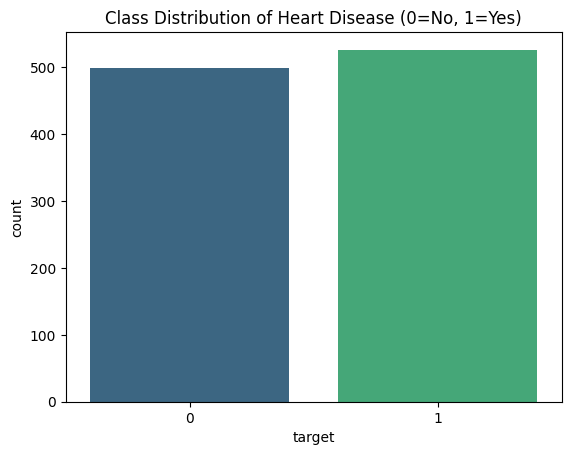

In [7]:
sns.countplot(data = df, x='target', palette='viridis', hue='target', legend=False) 
plt.title('Class Distribution of Heart Disease (0=No, 1=Yes)')
plt.show()

## Correlation Matrix

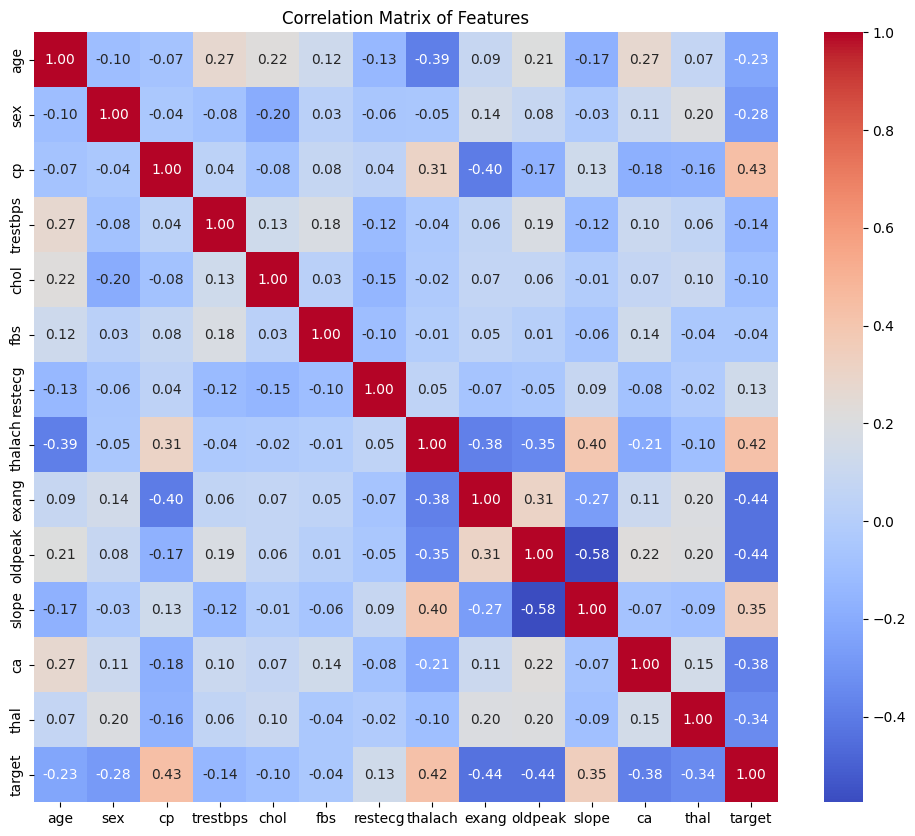

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

## Pair plot of Features

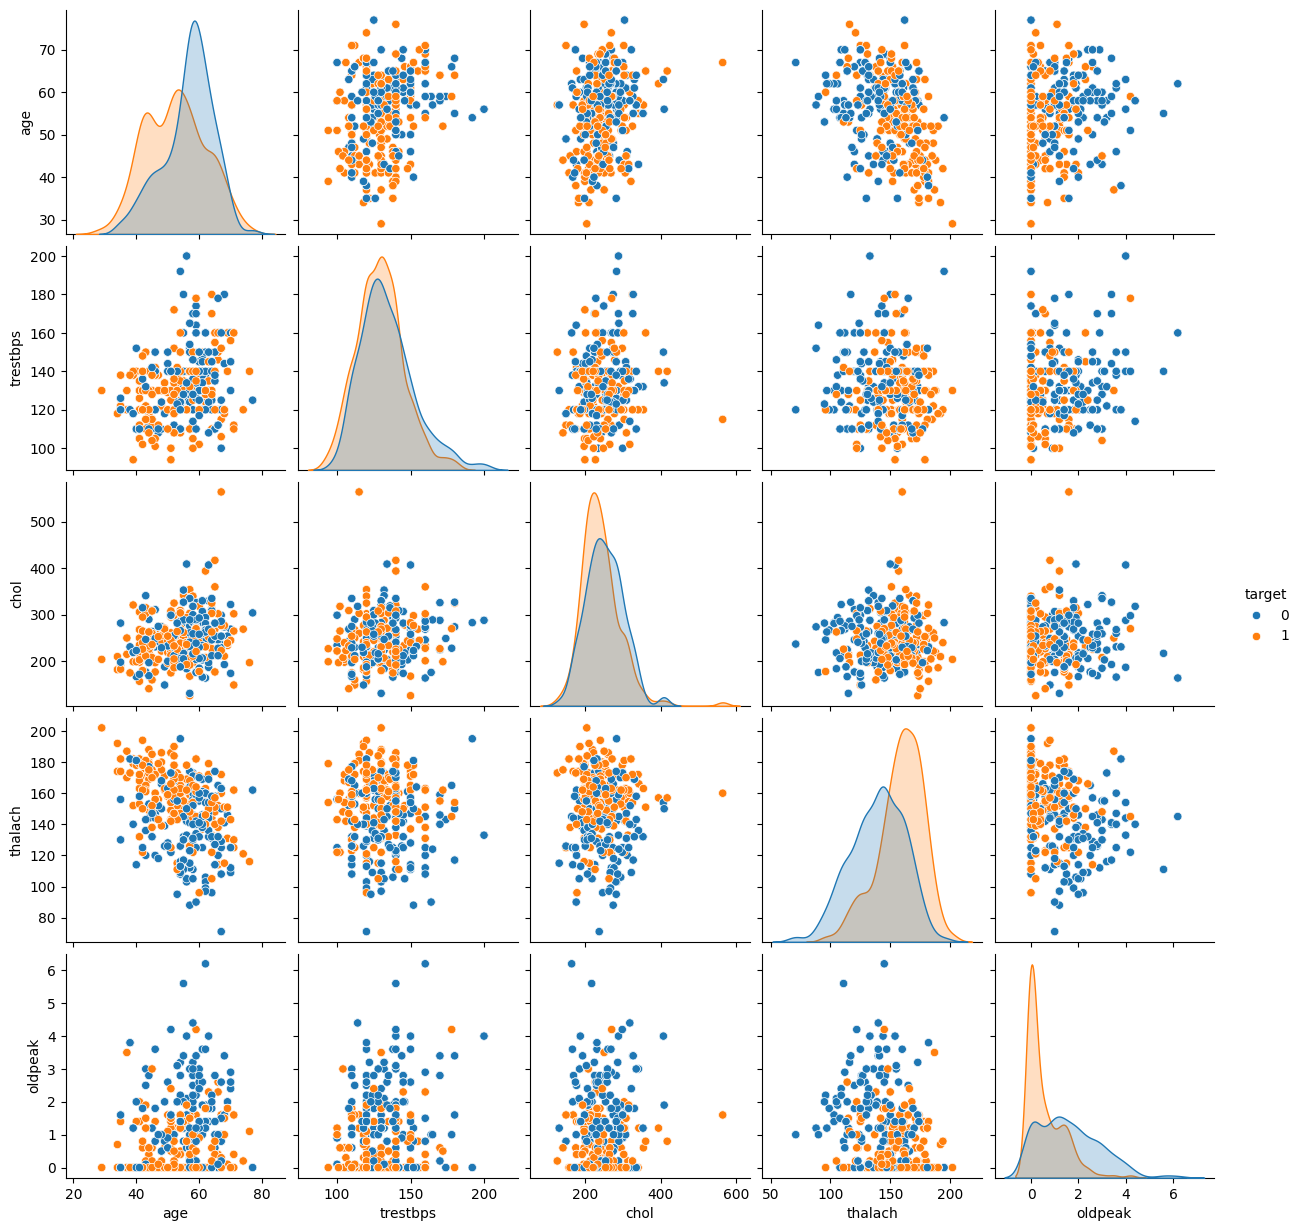

In [9]:
sns.pairplot(df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

## Box plot for Feature Insights

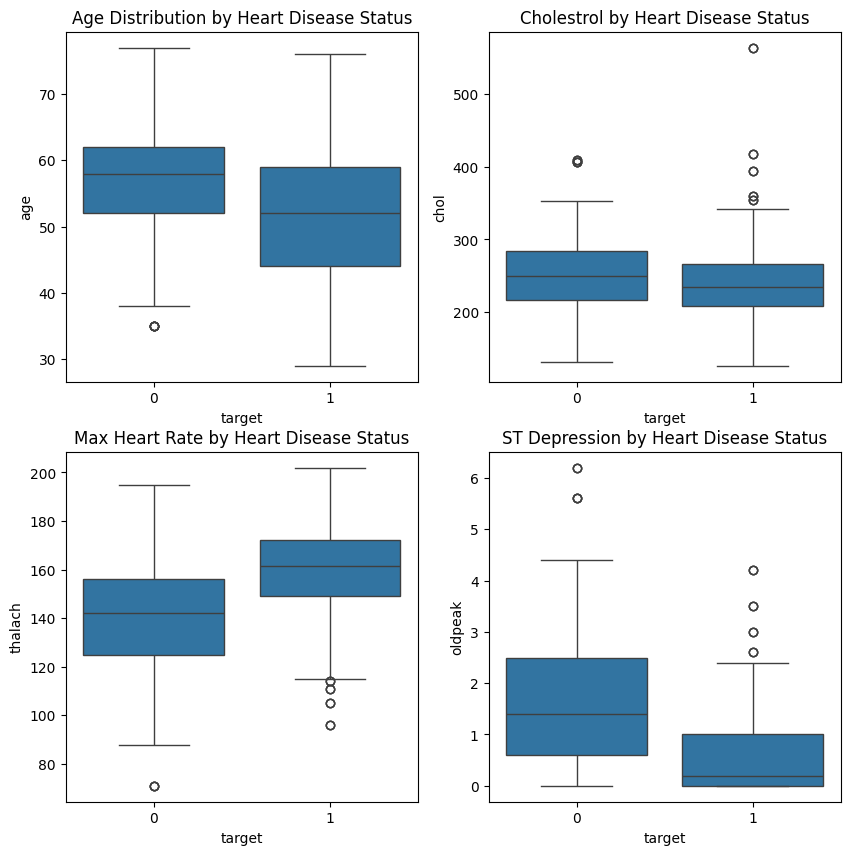

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='age', data=df) 
plt.title('Age Distribution by Heart Disease Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='chol', data=df) 
plt.title('Cholestrol by Heart Disease Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='thalach', data=df) 
plt.title('Max Heart Rate by Heart Disease Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='oldpeak', data=df) 
plt.title('ST Depression by Heart Disease Status')
plt.show()

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
x = df.drop('target', axis=1)
y = df['target']

In [13]:
x.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [14]:
ss.fit(x)
x_scaled = ss.transform(x)

In [15]:
x_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

## Split Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=40, test_size=0.14, stratify=y)

# Train Model

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train, y_train) 

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(85.81157775255392, 86.11111111111111)

In [21]:
accuracy_score(y_test, lr.predict(x_test))

0.8611111111111112

In [22]:
confusion_matrix(y_test, lr.predict(x_test))

array([[55, 15],
       [ 5, 69]])

In [23]:
classification_report(y_test, lr.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.92      0.79      0.85        70\n           1       0.82      0.93      0.87        74\n\n    accuracy                           0.86       144\n   macro avg       0.87      0.86      0.86       144\nweighted avg       0.87      0.86      0.86       144\n'

## Plot Confusion Matrix

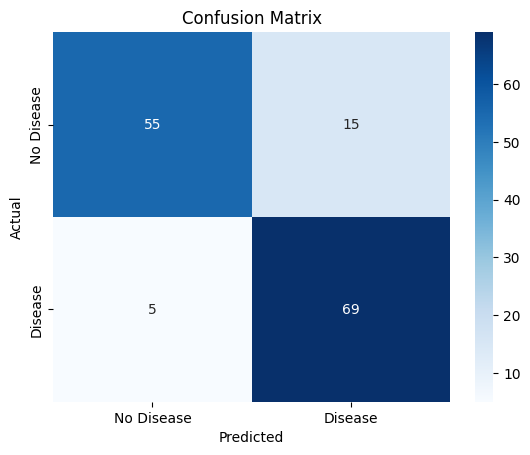

In [24]:
cm = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [25]:
from sklearn.svm import SVC

In [26]:
sv = SVC(random_state=42, C=7.0, kernel='rbf')
sv.fit(x_train, y_train) 

SVC(C=7.0, random_state=42)

In [27]:
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(99.31895573212259, 96.52777777777779)

In [28]:
accuracy_score(y_test, sv.predict(x_test))

0.9652777777777778

In [29]:
cm_svm = confusion_matrix(y_test, sv.predict(x_test)) 
cm_svm

array([[67,  3],
       [ 2, 72]])

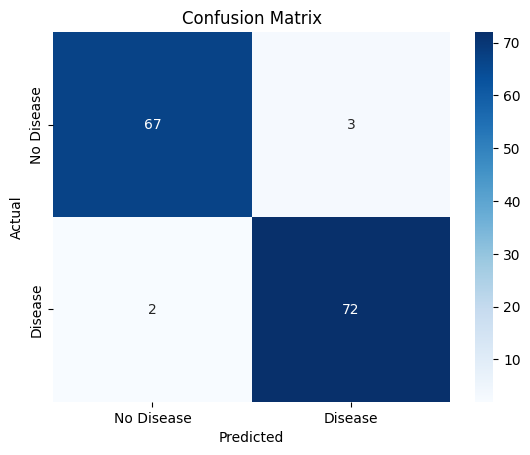

In [30]:
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(99.6594778660613, 95.13888888888889)

In [34]:
accuracy_score(y_test, knn.predict(x_test))

0.9513888888888888

In [35]:
cm_knn = confusion_matrix(y_test, knn.predict(x_test))
cm_knn

array([[70,  0],
       [ 7, 67]])

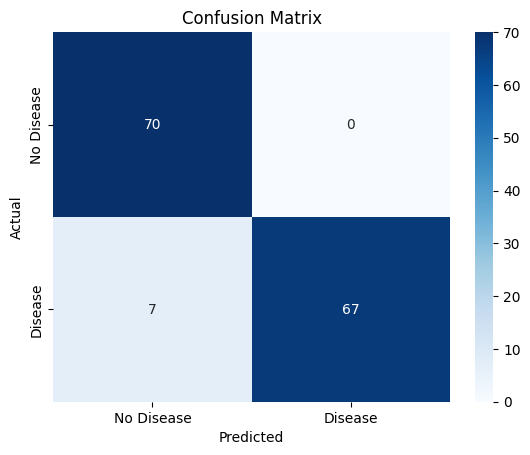

In [36]:
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(100.0, 100.0)

In [40]:
accuracy_score(y_test, rf.predict(x_test))

1.0

In [41]:
cm_rf = confusion_matrix(y_test, rf.predict(x_test))
cm_rf

array([[70,  0],
       [ 0, 74]])

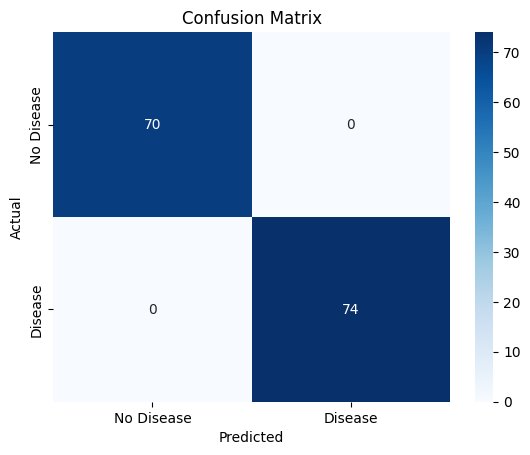

In [42]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Check Feature Importance

In [43]:
feature_importance = pd.Series(rf.feature_importances_, index=x.columns)
feature_importance = feature_importance.sort_values()

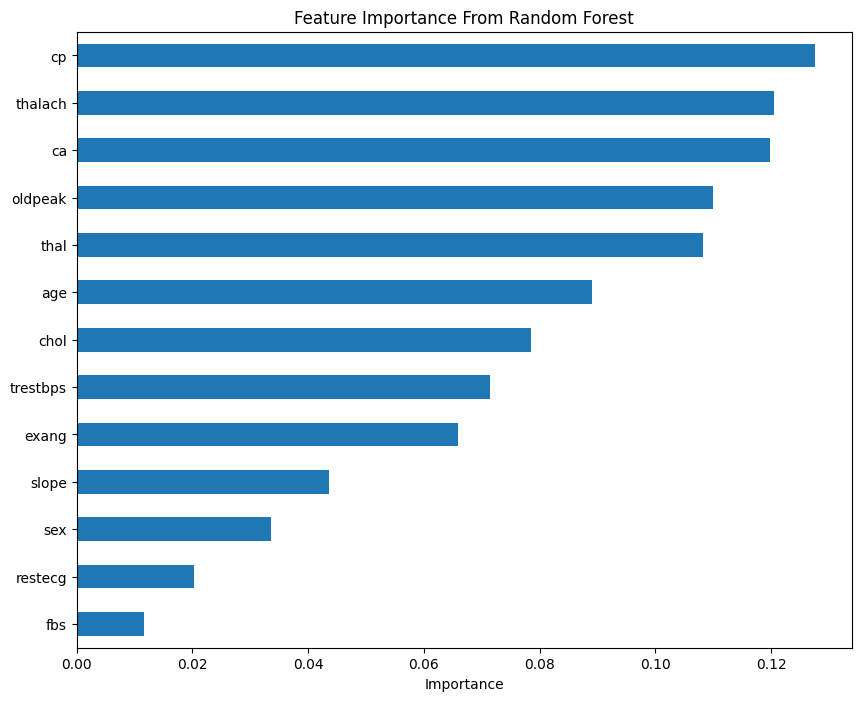

In [44]:
feature_importance.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance From Random Forest')
plt.xlabel('Importance')
plt.show()

# ROC Curve and AUC

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
y_probs = rf.predict_proba(x_test)[:, 1]

In [47]:
y_probs

array([0.14, 0.75, 0.  , 0.99, 0.98, 1.  , 0.  , 1.  , 0.95, 0.87, 0.99,
       0.88, 0.14, 0.97, 0.94, 0.8 , 1.  , 1.  , 0.  , 0.04, 0.02, 0.01,
       0.04, 0.99, 0.02, 0.05, 0.97, 0.96, 0.84, 0.01, 0.01, 0.03, 0.02,
       0.  , 0.12, 0.99, 0.23, 1.  , 0.  , 0.07, 0.8 , 0.01, 0.81, 0.95,
       0.88, 0.94, 0.94, 0.04, 0.08, 0.07, 0.13, 0.97, 0.03, 0.  , 0.11,
       0.01, 0.91, 1.  , 0.02, 1.  , 0.01, 0.06, 1.  , 0.02, 0.99, 0.  ,
       0.95, 0.08, 0.98, 0.04, 0.99, 0.01, 0.04, 0.97, 0.02, 1.  , 0.14,
       0.96, 0.  , 0.97, 0.01, 0.97, 0.88, 1.  , 0.03, 0.99, 0.92, 0.  ,
       0.03, 0.96, 0.02, 0.01, 0.81, 0.98, 0.12, 0.  , 1.  , 0.99, 1.  ,
       0.02, 0.12, 0.  , 0.93, 0.84, 0.98, 0.91, 0.02, 0.75, 1.  , 0.96,
       0.87, 0.13, 0.93, 0.93, 0.98, 1.  , 0.02, 0.87, 0.95, 0.  , 0.  ,
       0.02, 0.98, 0.23, 0.01, 0.  , 1.  , 0.14, 0.01, 0.08, 0.07, 0.87,
       0.92, 0.97, 0.03, 0.96, 0.9 , 0.01, 0.06, 1.  , 0.08, 0.02, 1.  ,
       0.9 ])

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

In [49]:
auc_score

np.float64(1.0)

## Plot the ROC Curve

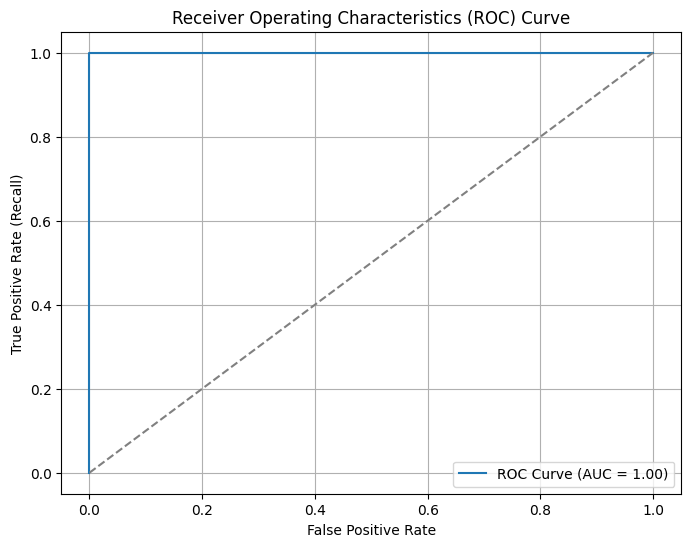

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Save The Model

In [51]:
import joblib

In [52]:
joblib.dump(rf, 'heart_disease_rf_model.pkl')

['heart_disease_rf_model.pkl']

In [53]:
loaded_model = joblib.load('heart_disease_rf_model.pkl')

In [54]:
loaded_model

RandomForestClassifier(random_state=42)

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
new_patient = {
    'age': 63,
    'sex': 1,
    'cp': 3, 
    'trestbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 0,
    'ca': 0,
    'thal': 1
}


In [58]:
new_df = pd.DataFrame([new_patient])
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [59]:
new_scaled = ss.transform(new_df)
new_scaled

array([[ 0.94463856,  0.66150409,  1.99930453,  0.76468824, -0.25209756,
         2.38733039, -1.00404855,  0.03852459, -0.71228712,  1.04598451,
        -2.24367514, -0.73197147, -2.1340963 ]])

In [60]:
prediction = loaded_model.predict(new_scaled) 
probability = loaded_model.predict_proba(new_scaled)[:, 1]

In [61]:
print(f"Prediction: {'Disease' if prediction == 1 else 'No Disease'}")
print(f"Probability of disease: {probability[0]:.2f}")

Prediction: Disease
Probability of disease: 0.92
